# Mask

In this notebook, we will be creating and applying a mask to the part of the SN1 filter of M33 field 7.

Let's start with importing `LUCI`. Just as described on the *readthedocs* page, we need to point our system path to our install location of the **LUCI** folder.

In [1]:
# Imports
import sys
sys.path.insert(0, '/home/carterrhea/Documents/LUCI/')  # Location of Luci
from LuciBase import Luci
import LUCI.LuciPlotting as lplt
import matplotlib.pyplot as plt
import numpy as np

We now will set the required parameters. We are also going to be using our machine learning algorithm to get the initial guesses.

In [2]:
#Set Parameters
# Using Machine Learning Algorithm for Initial Guess
Luci_path = '/home/carterrhea/Documents/LUCI/'
cube_dir = '/home/carterrhea/Documents/M33/SN1'  # Path to data cube
cube_name = 'SN1_Field7'  # don't add .hdf5 extension
object_name = 'M33_Field7'
redshift = -0.0006  # Redshift of M33
resolution = 1000

Note that here we have set both `ML_ref` and `ML_model` to None. This tells **LUCI** NOT to use the machine learning algorithm.

We intialize our LUCI object

In [3]:
# Create Luci object
cube = Luci(Luci_path, cube_dir+'/'+cube_name, cube_dir, object_name, redshift, resolution)

  0%|          | 0/9 [00:00<?, ?it/s]

Reading in data...


100%|██████████| 9/9 [00:09<00:00,  1.08s/it]


Let's quickly create a deep frame

# Make Mask
Now we will examine the deep image, choose a region to make a mask out of, and make the mask in numpy. Please note that you can make a mask any way you would like! Just be sure that the mask that you pass to `LUCI` for fitting is a numpy boolean array.

In [4]:
# Create Deep Image
cube.create_deep_image()

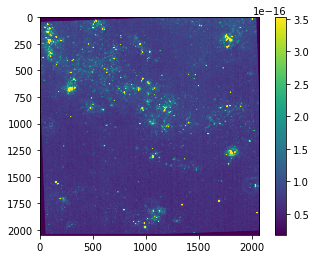

In [5]:
plt.imshow(cube.deep_image)
plt.clim(1e-4*np.max(cube.deep_image), 2e-3*np.max(cube.deep_image))
plt.colorbar()

We are going to mask out the regions where the deep image value is less than 3e-16

In [6]:
mask = np.ma.masked_where(cube.deep_image > 3e-16, cube.deep_image).mask

Let us visualize the mask. The regions that are yellow are unmasked regions.

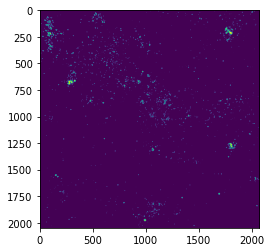

In [7]:
plt.imshow(mask)

## Fitting

Now we will use are mask in a fit!

Let's extract a background region and take a look at it. The background region is defined in a ds9 region file.

100%|██████████| 2064/2064 [00:08<00:00, 234.76it/s]


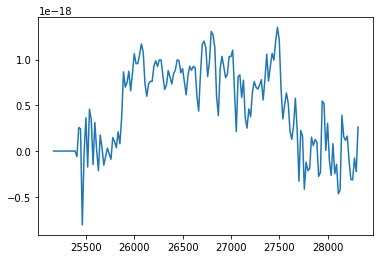

In [8]:
bkg_axis, bkg_sky = cube.extract_spectrum_region(cube_dir+'/bkg.reg', mean=True)  # We use mean=True to take the mean of the emission in the region instead of the sum
plt.plot(bkg_axis, bkg_sky)

In [10]:
# Fit!
vel_map, broad_map, flux_map, chi2_fits, mask = cube.fit_region(['OII3726', 'OII3729'], 'gaussian', [1, 1], [1, 1], mask, bkg=bkg_sky, binning=2)

100%|██████████| 1032/1032 [03:17<00:00,  5.23it/s]


14014


Let's take a look at the flux map.

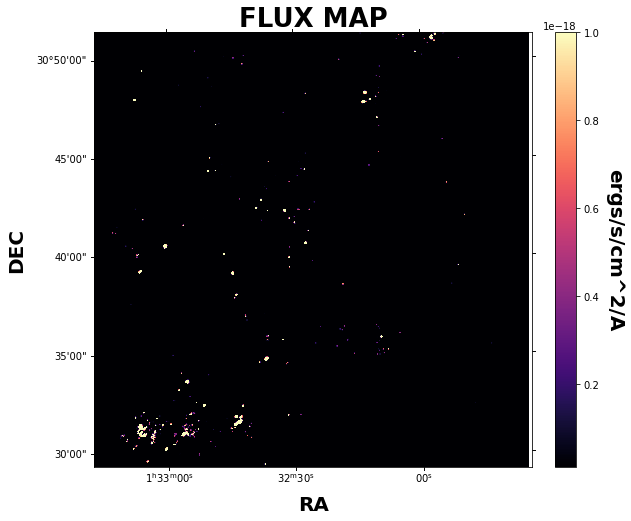

In [15]:
lplt.plot_map(flux_map[:,:,0], 'flux', cube_dir, cube.header, clims=[1e-20, 1e-18])